## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [5]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [7]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [9]:
"""
Compile 模型
"""

model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 2s 10ms/step - loss: 2.3044 - accuracy: 0.1297 - val_loss: 2.2034 - val_accuracy: 0.2041
Epoch 2/500
196/196 [==============================] - 2s 9ms/step - loss: 2.1880 - accuracy: 0.2114 - val_loss: 2.1362 - val_accuracy: 0.2443
Epoch 3/500
196/196 [==============================] - 2s 9ms/step - loss: 2.1225 - accuracy: 0.2481 - val_loss: 2.0843 - val_accuracy: 0.2596
Epoch 4/500
196/196 [==============================] - 2s 9ms/step - loss: 2.0754 - accuracy: 0.2677 - val_loss: 2.0424 - val_accuracy: 0.2795
Epoch 5/500
196/196 [==============================] - 2s 10ms/step - loss: 2.0384 - accuracy: 0.2787 - val_loss: 2.0078 - val_accuracy: 0.2924
Epoch 6/500
196/196 [==============================] - 2s 9ms/step - loss: 2.0018 - accuracy: 0.2925 - val_loss: 1.9793 - val_accuracy: 0.3066
Epoch 7/500
196/196 [==============================] - 2s 9ms/step - loss: 1.9772 - accuracy: 0.3055 - val_loss: 1.9558 - val_accuracy: 0.31

Epoch 58/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6440 - accuracy: 0.4272 - val_loss: 1.6448 - val_accuracy: 0.4236
Epoch 59/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6330 - accuracy: 0.4333 - val_loss: 1.6416 - val_accuracy: 0.4295
Epoch 60/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6317 - accuracy: 0.4321 - val_loss: 1.6359 - val_accuracy: 0.4304
Epoch 61/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6333 - accuracy: 0.4333 - val_loss: 1.6353 - val_accuracy: 0.4280
Epoch 62/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6351 - accuracy: 0.4288 - val_loss: 1.6326 - val_accuracy: 0.4305
Epoch 63/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6349 - accuracy: 0.4341 - val_loss: 1.6289 - val_accuracy: 0.4322
Epoch 64/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6204 - accuracy: 0.4389 - val_loss: 1.6257 - val_accuracy:

Epoch 115/500
196/196 [==============================] - 2s 9ms/step - loss: 1.5089 - accuracy: 0.4728 - val_loss: 1.5272 - val_accuracy: 0.4658
Epoch 116/500
196/196 [==============================] - 2s 9ms/step - loss: 1.5041 - accuracy: 0.4759 - val_loss: 1.5288 - val_accuracy: 0.4643
Epoch 117/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4970 - accuracy: 0.4783 - val_loss: 1.5272 - val_accuracy: 0.4624
Epoch 118/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4968 - accuracy: 0.4791 - val_loss: 1.5254 - val_accuracy: 0.4662
Epoch 119/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4962 - accuracy: 0.4797 - val_loss: 1.5268 - val_accuracy: 0.4636
Epoch 120/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4998 - accuracy: 0.4790 - val_loss: 1.5248 - val_accuracy: 0.4648
Epoch 121/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4943 - accuracy: 0.4795 - val_loss: 1.5185 - val_ac

196/196 [==============================] - 2s 9ms/step - loss: 1.4080 - accuracy: 0.5078 - val_loss: 1.4693 - val_accuracy: 0.4830
Epoch 172/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4107 - accuracy: 0.5072 - val_loss: 1.4568 - val_accuracy: 0.4861
Epoch 173/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4050 - accuracy: 0.5079 - val_loss: 1.4597 - val_accuracy: 0.4839
Epoch 174/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4092 - accuracy: 0.5087 - val_loss: 1.4564 - val_accuracy: 0.4869
Epoch 175/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4002 - accuracy: 0.5115 - val_loss: 1.4669 - val_accuracy: 0.4776
Epoch 176/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4002 - accuracy: 0.5100 - val_loss: 1.4587 - val_accuracy: 0.4823
Epoch 177/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4057 - accuracy: 0.5065 - val_loss: 1.4553 - val_accuracy: 0.4878

196/196 [==============================] - 2s 9ms/step - loss: 1.3286 - accuracy: 0.5373 - val_loss: 1.4325 - val_accuracy: 0.4943
Epoch 228/500
196/196 [==============================] - 2s 9ms/step - loss: 1.3308 - accuracy: 0.5329 - val_loss: 1.4120 - val_accuracy: 0.4970
Epoch 229/500
196/196 [==============================] - 2s 9ms/step - loss: 1.3255 - accuracy: 0.5362 - val_loss: 1.4188 - val_accuracy: 0.4981
Epoch 230/500
196/196 [==============================] - 2s 9ms/step - loss: 1.3273 - accuracy: 0.5355 - val_loss: 1.4067 - val_accuracy: 0.4978
Epoch 231/500
196/196 [==============================] - 2s 9ms/step - loss: 1.3322 - accuracy: 0.5325 - val_loss: 1.4043 - val_accuracy: 0.5010
Epoch 232/500
196/196 [==============================] - 2s 9ms/step - loss: 1.3274 - accuracy: 0.5379 - val_loss: 1.4350 - val_accuracy: 0.4865
Epoch 233/500
196/196 [==============================] - 2s 9ms/step - loss: 1.3250 - accuracy: 0.5382 - val_loss: 1.4124 - val_accuracy: 0.5041

196/196 [==============================] - 2s 9ms/step - loss: 1.2673 - accuracy: 0.5539 - val_loss: 1.3778 - val_accuracy: 0.5138
Epoch 284/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2567 - accuracy: 0.5599 - val_loss: 1.3755 - val_accuracy: 0.5153
Epoch 285/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2590 - accuracy: 0.5583 - val_loss: 1.3801 - val_accuracy: 0.5078
Epoch 286/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2507 - accuracy: 0.5596 - val_loss: 1.3950 - val_accuracy: 0.5017
Epoch 287/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2540 - accuracy: 0.5603 - val_loss: 1.3937 - val_accuracy: 0.5078
Epoch 288/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2622 - accuracy: 0.5604 - val_loss: 1.3930 - val_accuracy: 0.5046
Epoch 289/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2530 - accuracy: 0.5585 - val_loss: 1.3778 - val_accuracy: 0.5121

196/196 [==============================] - 2s 9ms/step - loss: 1.2027 - accuracy: 0.5803 - val_loss: 1.3554 - val_accuracy: 0.5210
Epoch 340/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2023 - accuracy: 0.5806 - val_loss: 1.3588 - val_accuracy: 0.5182
Epoch 341/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1927 - accuracy: 0.5836 - val_loss: 1.3854 - val_accuracy: 0.5143
Epoch 342/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1882 - accuracy: 0.5855 - val_loss: 1.3667 - val_accuracy: 0.5171
Epoch 343/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1970 - accuracy: 0.5802 - val_loss: 1.3518 - val_accuracy: 0.5210
Epoch 344/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1956 - accuracy: 0.5824 - val_loss: 1.3505 - val_accuracy: 0.5206
Epoch 345/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1889 - accuracy: 0.5843 - val_loss: 1.3640 - val_accuracy: 0.5171

196/196 [==============================] - 2s 9ms/step - loss: 1.1282 - accuracy: 0.6081 - val_loss: 1.3394 - val_accuracy: 0.5290
Epoch 396/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1309 - accuracy: 0.6050 - val_loss: 1.4063 - val_accuracy: 0.5059
Epoch 397/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1394 - accuracy: 0.6029 - val_loss: 1.3337 - val_accuracy: 0.5285
Epoch 398/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1384 - accuracy: 0.6024 - val_loss: 1.3444 - val_accuracy: 0.5225
Epoch 399/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1293 - accuracy: 0.6036 - val_loss: 1.3567 - val_accuracy: 0.5197
Epoch 400/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1306 - accuracy: 0.6062 - val_loss: 1.3357 - val_accuracy: 0.5267
Epoch 401/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1274 - accuracy: 0.6051 - val_loss: 1.3783 - val_accuracy: 0.5165

196/196 [==============================] - 2s 9ms/step - loss: 1.0757 - accuracy: 0.6213 - val_loss: 1.3430 - val_accuracy: 0.5250
Epoch 452/500
196/196 [==============================] - 2s 9ms/step - loss: 1.0727 - accuracy: 0.6239 - val_loss: 1.3399 - val_accuracy: 0.5226
Epoch 453/500
196/196 [==============================] - 2s 9ms/step - loss: 1.0797 - accuracy: 0.6215 - val_loss: 1.3360 - val_accuracy: 0.5258
Epoch 454/500
196/196 [==============================] - 2s 9ms/step - loss: 1.0716 - accuracy: 0.6262 - val_loss: 1.3356 - val_accuracy: 0.5291
Epoch 455/500
196/196 [==============================] - 2s 9ms/step - loss: 1.0768 - accuracy: 0.6243 - val_loss: 1.3378 - val_accuracy: 0.5252
Epoch 456/500
196/196 [==============================] - 2s 9ms/step - loss: 1.0685 - accuracy: 0.6248 - val_loss: 1.3428 - val_accuracy: 0.5246
Epoch 457/500
196/196 [==============================] - 2s 9ms/step - loss: 1.0721 - accuracy: 0.6230 - val_loss: 1.3665 - val_accuracy: 0.5167

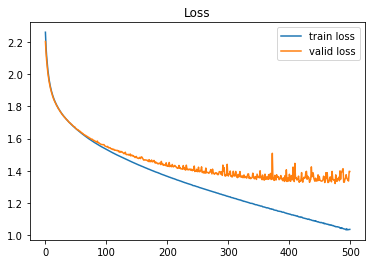

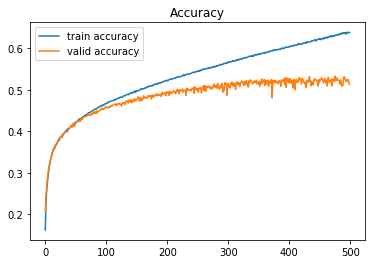

In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()